**Unsupervised learning** is a type of machine learning where the algorithm is given input data without explicit instructions on what to do with that data. The system tries to learn the patterns and structure from the data without labeled responses to guide the learning process. The goal is often to discover hidden patterns, group similar data points, or reduce the dimensionality of the data.

**K means**:

K-means is a popular unsupervised machine learning algorithm used for clustering data. The goal of the K-means algorithm is to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively refines the cluster assignments until convergence.
<br>
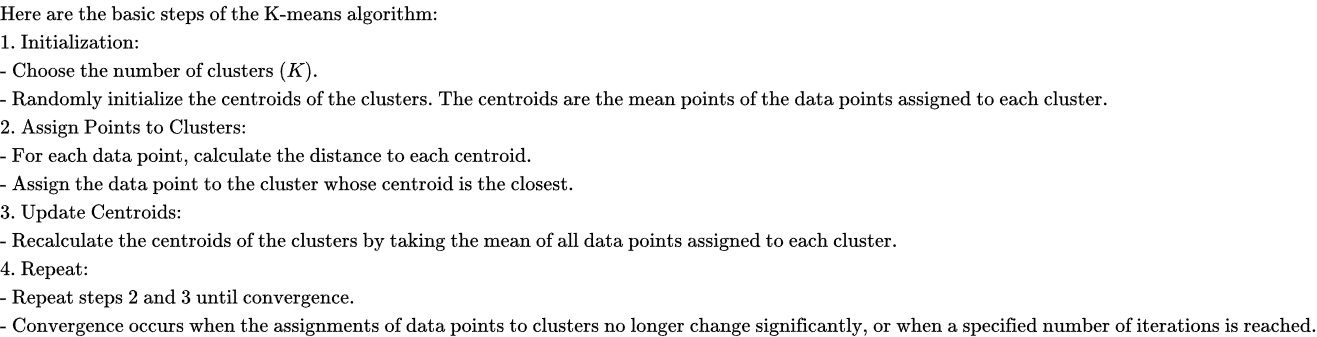
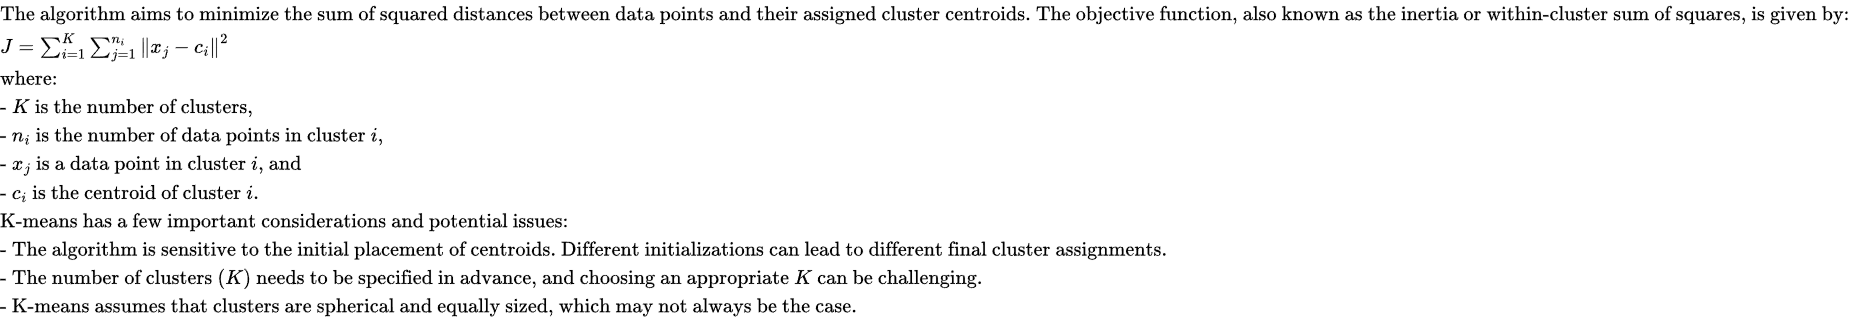

<br>

The Loop will bascally run till **Previous position of centroid != Actual Position of the Centroid**

<br>

**Elbow method and it's working :**

The **Elbow Method** is a technique used to determine the optimal number of clusters (K) in a K-means clustering algorithm. It involves running the K-means algorithm on the dataset for a range of values of K and then plotting the within-cluster sum of squares (WCSS) or inertia for each K. The "elbow" of the plot represents a point where increasing K further doesn't significantly decrease the inertia, suggesting that it might be a reasonable choice for the number of clusters.
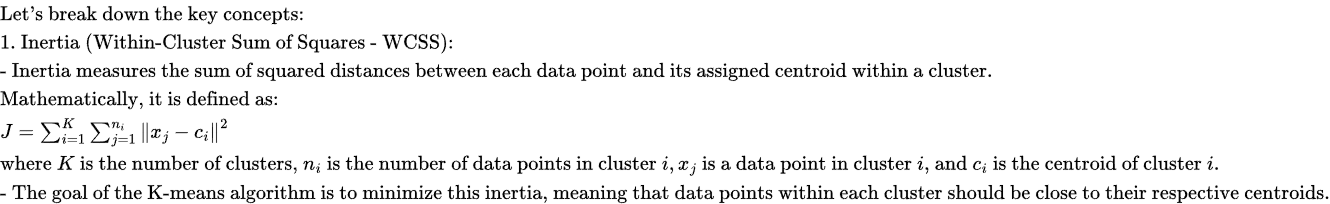
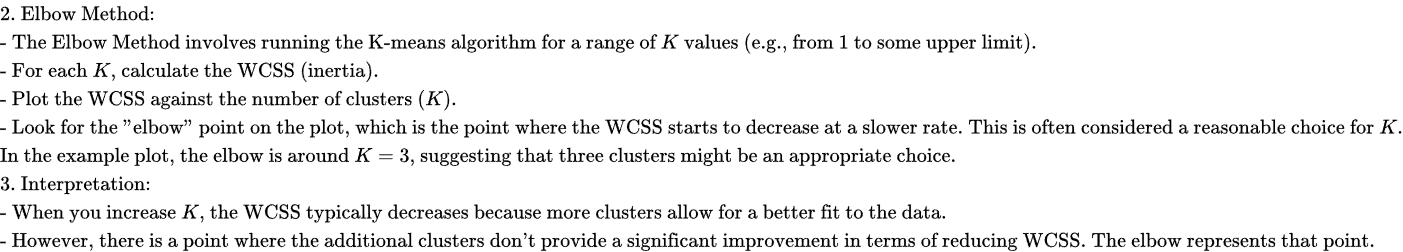
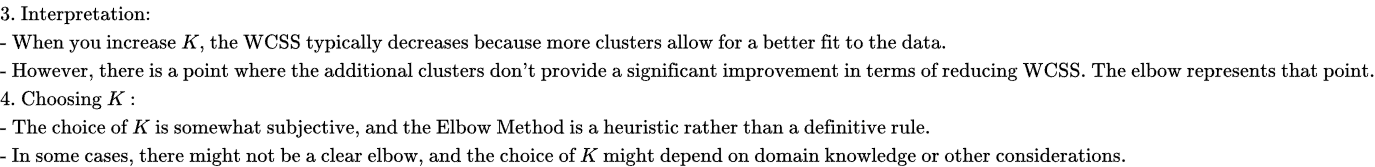

However, there is a point where the addition of more clusters provides diminishing returns in terms of reducing WCSS. The curve in the Elbow Method plot starts to bend, indicating that the rate of decrease in WCSS slows down.

The algorithm considers the intra-cluster similarity, which is the similarity between data points within the same cluster, and the inter-cluster similarity, which is the similarity between data points in different clusters


**Assumptions for K-means**:
K-means clustering is particularly suitable for datasets that meet the following criteria:
1. Well-Separated Clusters: It works best when clusters are distinct and well-separated from each other.
2. Spherical Clusters: K-means assumes that clusters are spherical and equally sized, meaning it works best when the clusters have a roughly circular (in 2D) or spherical (in 3D) shape.
3. Similar Cluster Density: It is most effective when the clusters have roughly the same number of data points.
4. Size of Dataset: It is efficient for large datasets due to its simplicity.
5. Numerical Data: K-means is typically used with numerical data. For categorical data, variations like K-modes clustering are more appropriate.


**Limitations**:

1. Number of Clusters: The number of clusters K must be defined beforehand, which can be challenging if the number isn’t known in advance.
2. Sensitivity to Initial Centroids: The final clusters depend heavily on the initial randomly selected centroids. Poor initialization can lead to suboptimal clustering.
3. Outliers: K-means is sensitive to outliers since a small number of extreme values can significantly distort the mean of a cluster.



In [88]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We will drop 'object' datatype - Genre column and customer-ID (all values unique) as of now because Kmeans deal with numerical data only.

In [91]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


scales of our dataset are approximately similiar, so we wont do scaling as of now.

In [92]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [93]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


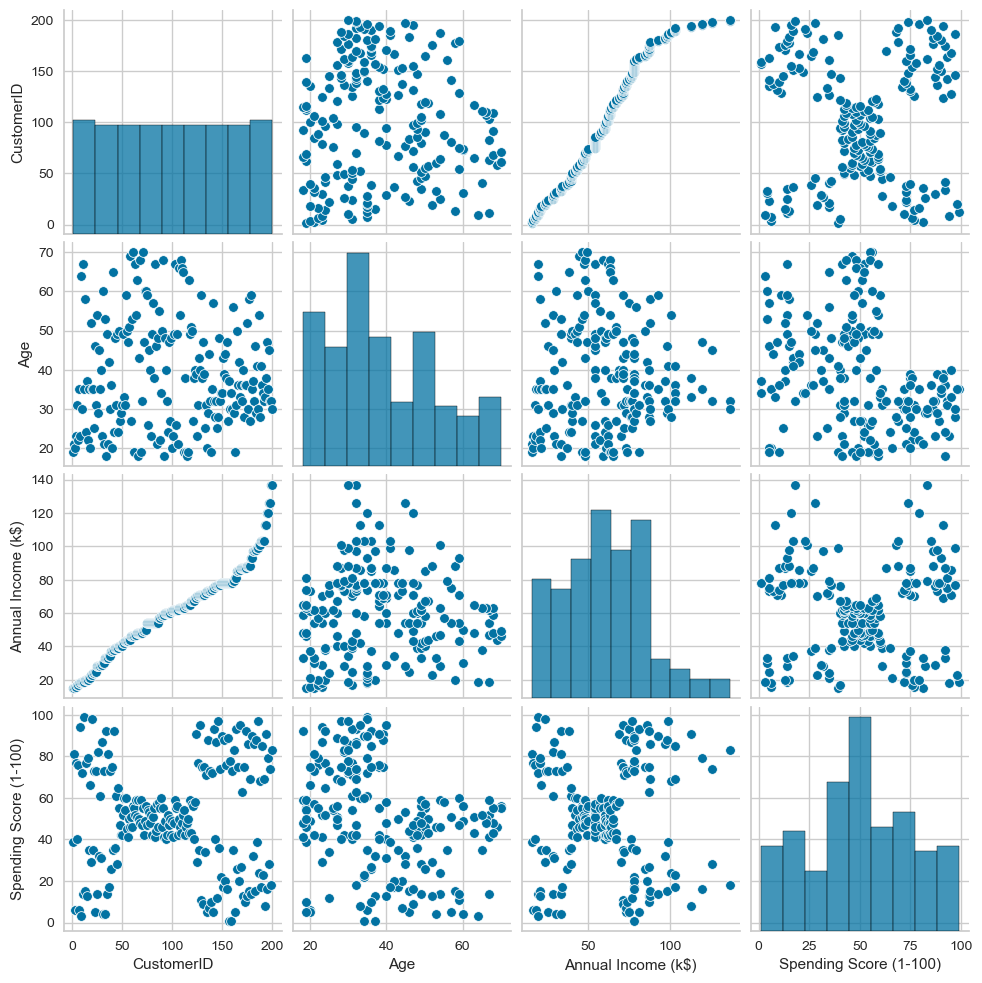

In [94]:
import seaborn as sns

sns.pairplot(df)

Clustering algorithms, like K-means, assume spherical-shaped clusters, and their performance is influenced by the data distribution. A pair plot, which visualizes scatterplots of input variables and can include the target variable, helps assess the data's structure and identify non-spherical clusters.

**Age** column does not exhibit the assumptions for with target variable, hence we will drop it as it can lead to pooor performance of kmeans algorithm.

In [95]:
dummy = df.drop(['CustomerID','Age','Genre'],axis = 1)

#### Let's apply the kmeans algorithm now

##### 1. Finding the correct number of clusters 'k' value for our dataset - using elbow method.

In [96]:
from sklearn.cluster import KMeans

wcss = []
k = range(1,10)
for cluster in k:
    k_means = KMeans(n_clusters=cluster)
    k_means = k_means.fit(dummy)
    wcss.append(k_means.inertia_)
    
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25018.576334776335,
 21862.09267218289]

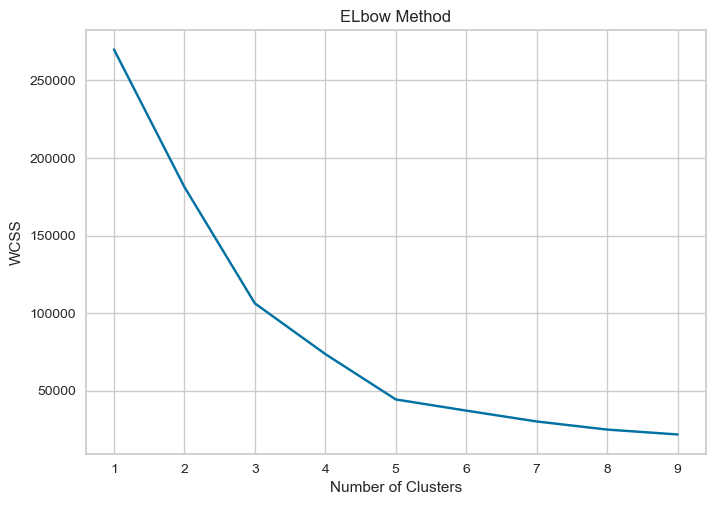

In [97]:
plt.plot(k,wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('ELbow Method')
plt.show()

we can see, after 5 clusters the addition of more clusters provides diminishing returns in terms of reducing WCSS. The curve in the Elbow Method plot starts to bend, indicating that the rate of decrease in WCSS slows down.

Hence k = 5.

##### 2. Finding the correct number of clusters 'k' value for our dataset - using  silhouette score.

Elbow method only factors in the 'Cohesion/Compactness' of a cluster. it does not consider the seperation. So for the we will study **Silhouette Score**


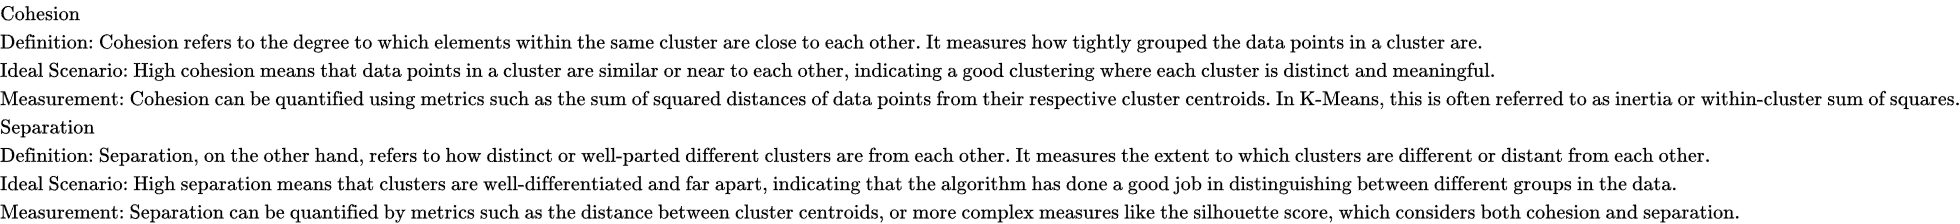

The **silhouette score** is a measure used to assess the quality of clusters created by a clustering algorithm. It provides a succinct graphical representation of how well each data point lies within its cluster, which is a combination of both cohesion and separation. The value of the silhouette score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.
<br>
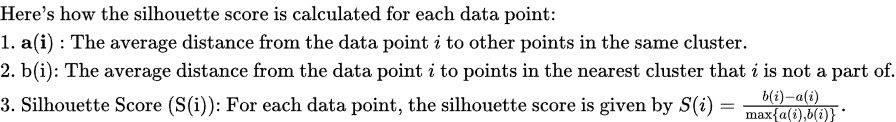

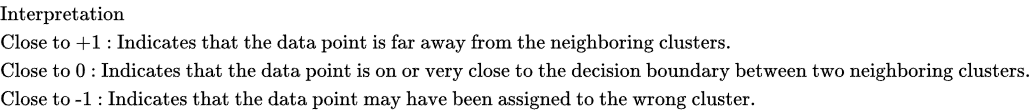

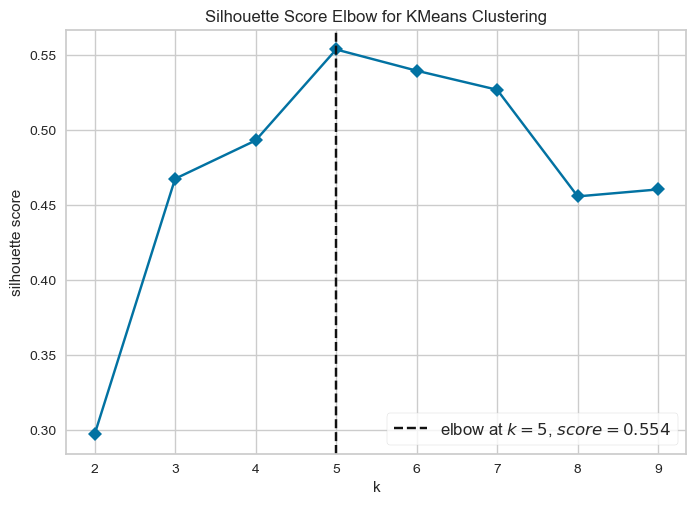

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [98]:
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 123)
visualizer = KElbowVisualizer(model, k = (2,10), metric = 'silhouette',timings = False)
visualizer.fit(dummy)
visualizer.show()

Now we can clearly see both elbow and silhoutte score gives us '5' clusters as the optimal result. 

Therefore n_clusters = 5 for our df.

##### training our model now

In [99]:
# K means Hyper-parameters

km = KMeans(n_clusters = 5,  #This value is calculated via the elbow/silhoutte method
       init = 'k-means++', #faster convergence = "kmeans++"" or "random"
       n_init = 'warn',#no of times kmeans alg runs for different centriods
       max_iter = 200, #no of iterations i want to train, int value
       tol = 0.0001, # stopping criteria
       verbose = 0,
       random_state = 123,
       copy_x = True, # Whether to copy the input data; if False, the input data may be modified
       algorithm = 'lloyd' # sparse: no of columns is greater than no of observations.
       )

In [100]:
cluster = km.fit_predict(dummy)
cluster

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [101]:
df['cluster'] = cluster

In [102]:
cluster_analysis = df.groupby('cluster').mean()

In [103]:
cluster_analysis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,164.371429,41.114286,88.200000,17.114286
3,23.000000,45.217391,26.304348,20.913043
4,23.090909,25.272727,25.727273,79.363636


In [104]:
df1 = df[df.cluster == 0 ]
df2 = df[df.cluster == 1 ]
df3 = df[df.cluster == 2 ]
df4 = df[df.cluster == 3 ]
df5 = df[df.cluster == 4 ]

In [105]:
df1.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

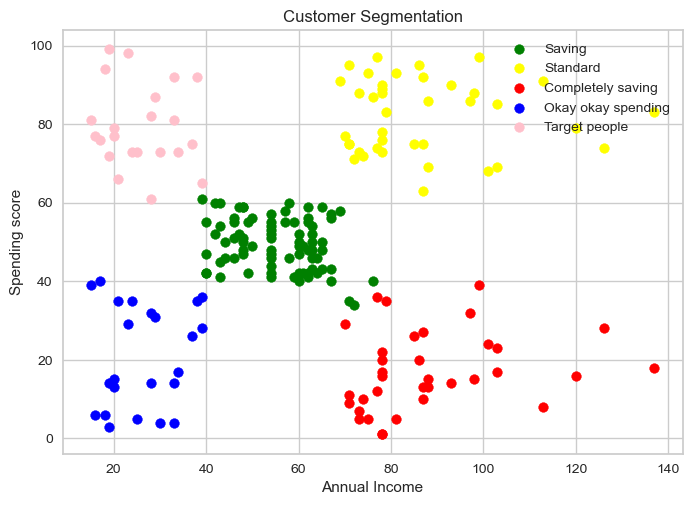

In [106]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = 'green',label = 'Saving')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = 'yellow',label = 'Standard')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = 'red',label = 'Completely saving')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color = 'blue',label = 'Okay okay spending')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color = 'pink',label = 'Target people')
plt.title("Customer Segmentation")
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend(loc = "upper right")
plt.grid(True)
plt.show()